# <center>Блок 4. Введение в машинное обучение<center>
## <center>ML-3. Обучение с учителем: классификация<center>
### <center>1.Введение<center>
### <center>2.Логистическая регрессия<center>
#### <center>Общее представление о логистической регрессии<center>

In [1]:
# Задание 2.5
z = 1 + 5*0.3 - 0.3*3
p = 1 / (1+2.718**-z)
print(round(p,2))

0.83


#### <center>Поиск параметров логистической регрессии<center>
#### <center>Логистическая регрессия в sklearn<center>

In [2]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

import warnings #для игнорирования предупреждений
# Игнорируем предупреждения
warnings.filterwarnings('ignore')

# Устанавливаем стиль визуализации в matplotlib
%matplotlib inline
#plt.style.use('seaborn')

In [3]:
diabetes_data = pd.read_csv('C:\IDE\data\Block_4\diabetes_cleaned.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,35.7,0.148,21,0
2,2,108.0,64.0,29.0,30.8,0.158,21,0
3,8,107.0,80.0,29.0,24.6,0.856,34,0
4,7,136.0,90.0,29.0,29.9,0.210,50,0


In [4]:
print(diabetes_data.shape)

(757, 8)


<Axes: >

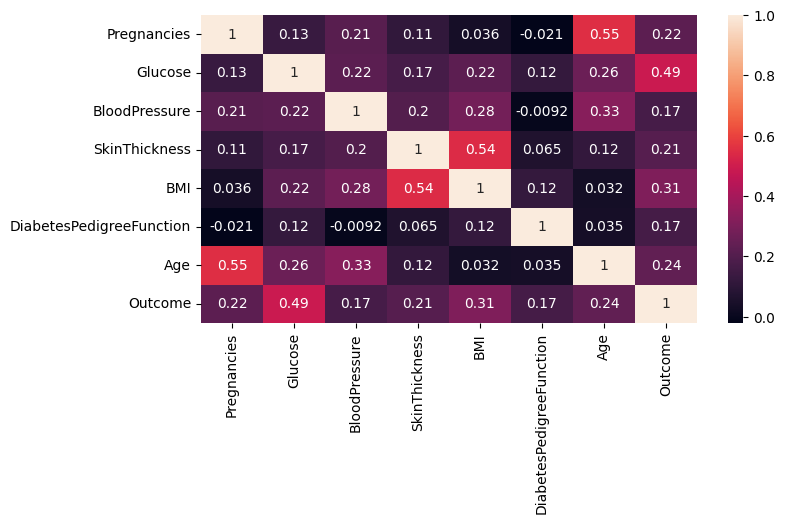

In [5]:
fig, ax = plt.subplots(figsize=(8,4))
sns.heatmap(diabetes_data.corr(), annot=True)

Text(0.5, 1.0, 'Scatter Plot for Glucose VS BMI')

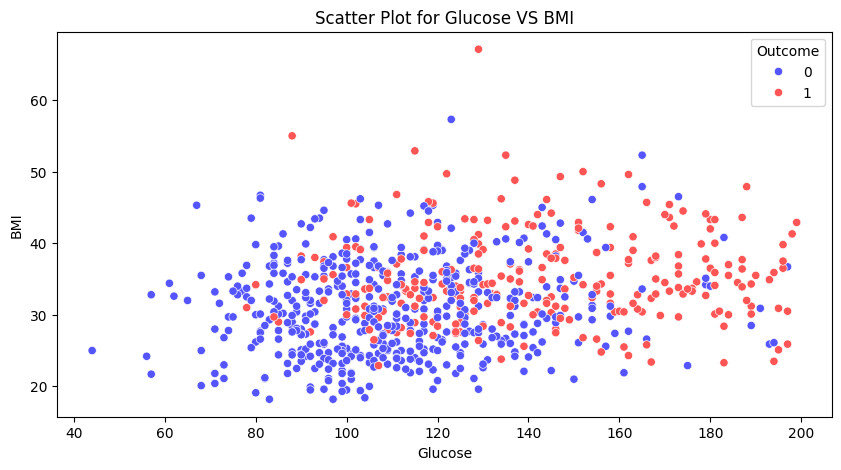

In [6]:
fig, ax = plt.subplots(figsize=(10,5)) #фигура + координатная плоскость
# Строим диаграмму рассеивания
sns.scatterplot(
    data=diabetes_data, #датасет
    x='Glucose', #ось абсцисс
    y='BMI', #ось ординат
    hue='Outcome', #группировка
    palette='seismic', #палитра
    ax=ax #координатная плоскость
);
# Задаем название графику
ax.set_title('Scatter Plot for Glucose VS BMI')

In [7]:
# создаем матрицу наблюдений X и столбец с ответами y
X = diabetes_data[['Glucose', 'BMI']]
y = diabetes_data['Outcome']

In [8]:
from sklearn import linear_model #линейные модели

In [9]:
# Создаем обьект класса LinearRegression
log_reg_2d = linear_model.LogisticRegression(random_state=42)
# Обучаем модель минимизируя logloss
log_reg_2d.fit(X, y)
# Выводим результирующие коэффициенты
print('w0: {}'.format(log_reg_2d.intercept_))
print('w1, w2: {}'.format(log_reg_2d.coef_))

w0: [-8.24901758]
w1, w2: [[0.03779291 0.08757414]]


In [10]:
# Значение глюкозы и BMI для пациента
x_new = pd.DataFrame({'Glucose': [180], 'BMI': [51]})
# Делаем предсказание вероятностей
y_new_proba_predict = log_reg_2d.predict_proba(x_new)
print('Predicted probabilites: {}'.format(np.round(y_new_proba_predict,2)))

Predicted probabilites: [[0.05 0.95]]


In [11]:
# Делаем предсказание класса
y_new_predict = log_reg_2d.predict(x_new)
print('Predicted class: {}'.format(y_new_predict))

Predicted class: [1]
